In [20]:
"""
KNN Classifier Implementation
"""

from collections import Counter
import numpy as np

def euclidean_distance(x1, x2):
    """
    Compute the Euclidean distance between two vectors
    d = root((x1-x2)^2 + (y1-y2)^2)
    """
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    """
    K Nearest Neighbors classifier
    """
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        """
        Train the model
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the class for the input data
        """
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        """
        Helper function to predict single sample
        """
        # Compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # Get the closest k
        k_indices = np.argsort(distances)[:self.k] # Get the indices of the k nearest neighbors in the training set s
        k_nearest_labels = [self.y_train[i] for i in k_indices]


        # Majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

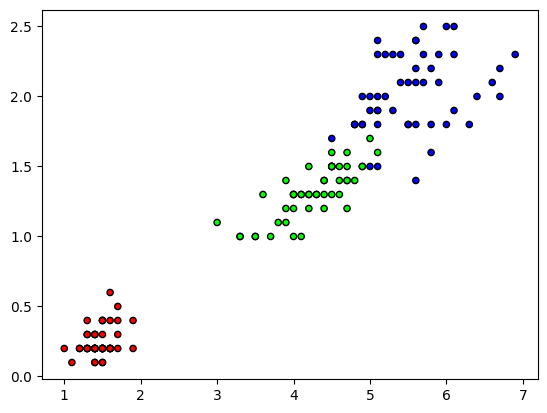

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
Accuracy: 96.67%


In [27]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# from KNN import KNN

cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()


clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
acc_percent = round(acc * 100, 2)
print(f"Accuracy: {acc_percent}%")

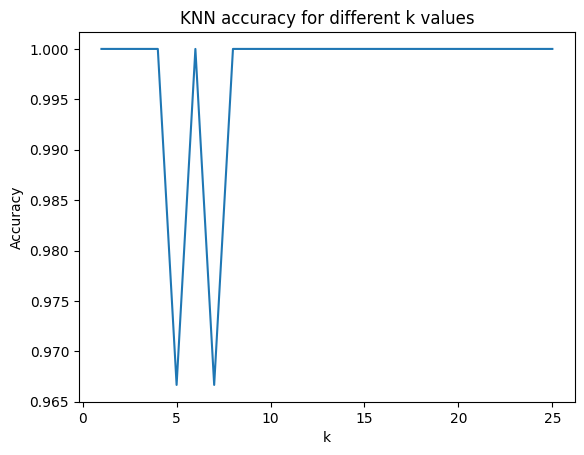

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

k_values = range(1, 26)
accuracies = []

for k in k_values:
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = np.sum(predictions == y_test) / len(y_test)
    accuracies.append(acc)

plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN accuracy for different k values')
plt.show()

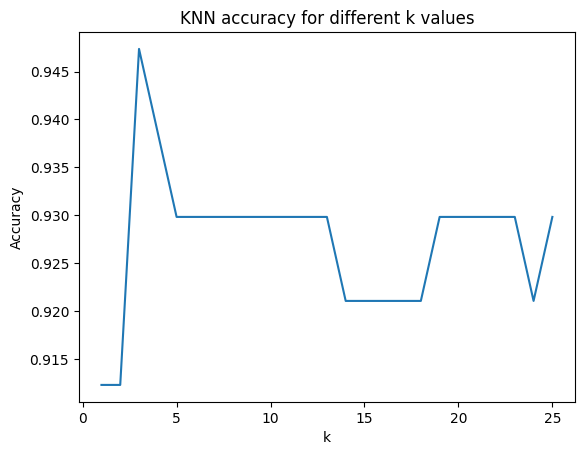

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

k_values = range(1, 26)
accuracies = []

for k in k_values:
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = np.sum(predictions == y_test) / len(y_test)
    accuracies.append(acc)

plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN accuracy for different k values')
plt.show()